#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [74]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve 
from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt


#**Ejercicio-1.** 

In [16]:
# Cargamos el data set 
data = 'dataset_Facebook.csv'
df = pd.read_csv(data, sep=";")
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [23]:
# Cambiamos el nombre del feature Lifetime People who have liked a Page and engaged with a post'.

ndf = df.copy()
ndf.rename(columns={'Lifetime People who have liked your Page and engaged with your post': 'LPE'}, inplace=True)
ndf.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,LPE,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [49]:
# Seleccionamos las variables de entrada X
# variable de salida Lifetime People who have liked your Page and engaged with your post - LPE

X, y = ndf.iloc[:,:7], ndf.iloc[:,14]
X

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0
...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0
496,81370,Photo,2,1,5,8,0.0
497,81370,Photo,1,1,5,2,0.0
498,81370,Photo,3,1,4,11,0.0


#**Ejercicio-2.**

In [50]:
#Partición de datos
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.20, random_state = 7)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(400, 7) : dimensión de datos de entrada para entrenamiento
(100, 7) : dimensión de datos de entrada para prueba
(400,) : dimensión de variable de salida para entrenamiento
(100,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

In [80]:
# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y_true, y_pred):
    return (np.mean(np.square(y_true - y_pred)))**(1/2)


# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_true, y_pred):
    return (np.mean((np.abs(y_true - y_pred)/y_true)))*100

#**Ejercicio-4.**

In [52]:
# Exploración variables 
# Buscamos valores nulos - NA 
ndf.isna().sum()

Page total likes                                                0
Type                                                            0
Category                                                        0
Post Month                                                      0
Post Weekday                                                    0
Post Hour                                                       0
Paid                                                            1
Lifetime Post Total Reach                                       0
Lifetime Post Total Impressions                                 0
Lifetime Engaged Users                                          0
Lifetime Post Consumers                                         0
Lifetime Post Consumptions                                      0
Lifetime Post Impressions by people who have liked your Page    0
Lifetime Post reach by people who like your Page                0
LPE                                                             0
comment   

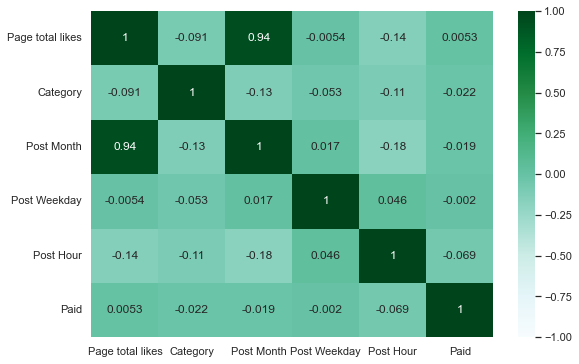

In [65]:
# Calculamos matriz de correlación entre las variables de entrada 

sns.set(rc={'figure.figsize':(9,6)})

sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='BuGn')
plt.show()

In [53]:
# 
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Page total likes                                              500 non-null    int64  
 1   Type                                                          500 non-null    object 
 2   Category                                                      500 non-null    int64  
 3   Post Month                                                    500 non-null    int64  
 4   Post Weekday                                                  500 non-null    int64  
 5   Post Hour                                                     500 non-null    int64  
 6   Paid                                                          499 non-null    float64
 7   Lifetime Post Total Reach                                     500 non-n

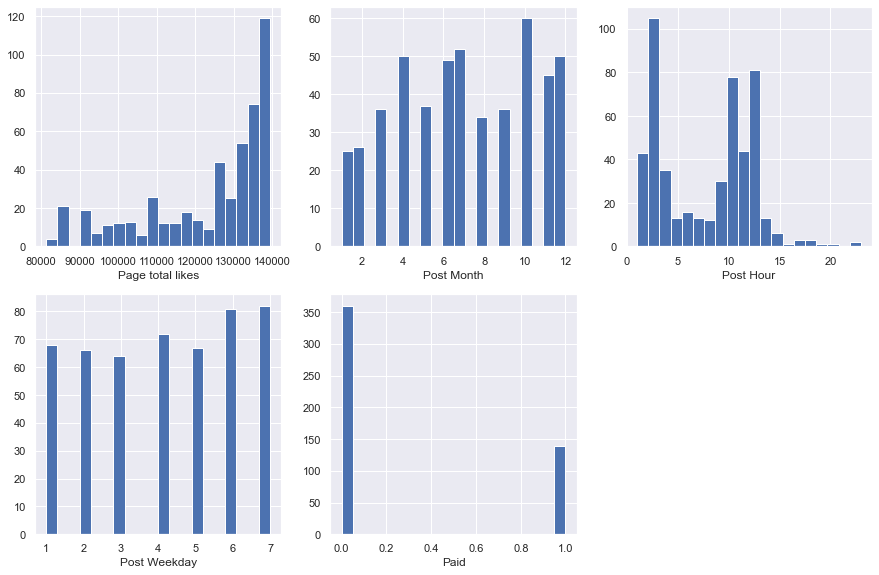

In [68]:
# Agregamos histogramas para validar distribución de las variables de entrada

variables = ['Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']
sns.set(rc={'figure.figsize':(15,15)}) 

for x in range(0,5):
    plt.subplot(3,3, x+1) 
    var = ndf[variables[x]]
    
    plt.hist(var, bins=20)
    plt.xlabel(variables[x])
plt.show()

- Podemos observar que la variable 'Page total likes' tiene una distribución ajustada a la derecha, debemos aplicar un ajuste para tener una distribución homogénea, así como un escalamiento en los datos para que estos no tengan mayor peso en las ponderaciones de los modelos.
- La variable Post Hour con una distribución ajustada a la izquierda con algunas ondulaciones.
- Post Month y Post Weekday cuentan con una distribución con multiples variaciones, lo que nos indica 

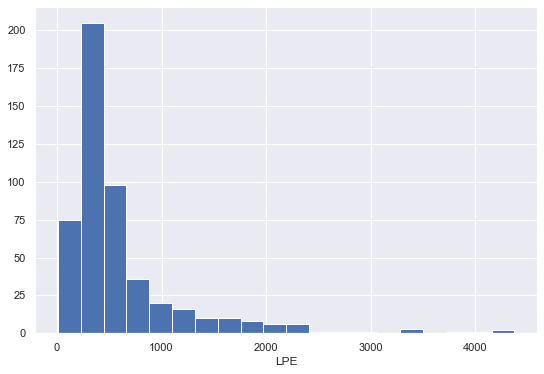

In [66]:
# Analizamos distribución variable de salisa - LPE

plt.hist(y, bins=20)
plt.xlabel('LPE')
plt.show()

- La variable de salida LPE tiene distribución ajustada a la izquierda.

In [101]:
# Se realizan transformaciones e imputaciones sobre las variables
var_numericas = ['Page total likes']
var_ordinales = ['Post Month', 'Post Hour','Post Weekday']
var_binarias = ['Paid']
var_categoricas = ['Type']

# Imputación variables númericas de entrada- media

num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                ('escalaNum', MinMaxScaler(feature_range=(1,2)))])


# Imputación variables discretas de entrada

ord_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])

# Imputación variables binarias de entrada

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                 ('oneHotE', OneHotEncoder(handle_unknown='ignore'))])

# Imputación variables catégoricas de entrada - One-Hot encoding

cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                 ('oneHotE', OneHotEncoder(handle_unknown='ignore'))])

# Aplicamos las tranformaciones definidas en los pipelines para las variables de entrada

colunmTransformer = ColumnTransformer(transformers= [('numpipe', num_pipeline, var_numericas),
                                                     ('ordpipe', ord_pipeline, var_ordinales),
                                                     ('catpipe', cat_pipeline, var_categoricas),
                                                     ('catbin', bin_pipeline, var_binarias),],
                                     remainder='passthrough')


#**Ejercicio-5.**

In [111]:
# Dividimos nuestros datos de entrenamiento y validación 

#Partición de datos
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.25, random_state = 7)
 

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento')
print(Y_test.shape, ': dimensión de datos de entrada para prueba')

(300, 7) : dimensión de datos de entrada para entrenamiento
(100,) : dimensión de datos de entrada para prueba


In [120]:
# Utilizamos la función DummyRegressor
resultados = list()

model = DummyRegressor(strategy="mean")
pipeline = Pipeline(steps=[('ct', colunmTransformer), ('m', model)])
    
kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=0)
                       
mismetricas = {'RMSE': make_scorer(mi_RMSE),
               'MAE': make_scorer(mi_MAE),
               'MAPE': make_scorer(mi_MAPE)}
                        
resultadosImp = cross_validate(pipeline,
                               X_test, Y_test,
                               scoring=mismetricas,
                               cv=kfold,
                               return_train_score=True)
                        
resultados.append(resultadosImp)
                        
print("***** Entrenamiento *****")
    
    
print('mean RMSE: %.3f (%.4f) \nmean MAE: %.3f (%.4f) \nmean MAPE: %.3f (%.4f)\n' % (np.mean(resultadosImp['test_RMSE']),
                                                                          np.std(resultadosImp['test_RMSE']),
                                                                          np.mean(resultadosImp['test_MAE']),
                                                                          np.std(resultadosImp['test_MAE']),
                                                                          np.mean(resultadosImp['test_MAPE']),
                                                                          np.std(resultadosImp['test_MAPE']), 
                                                                          ))

    
print("***** Validación *****")
    
print('mean RMSE: %.3f (%.4f) \nmean MAE: %.3f (%.4f) \nmean MAPE: %.3f (%.4f)\n' % (np.mean(resultadosImp['train_RMSE']),
                                                                          np.std(resultadosImp['train_RMSE']),
                                                                          np.mean(resultadosImp['train_MAE']),
                                                                          np.std(resultadosImp['train_MAE']),
                                                                          np.mean(resultadosImp['train_MAPE']),
                                                                          np.std(resultadosImp['train_MAPE']), 
                                                                          ))

***** Entrenamiento *****
mean RMSE: 565.661 (57.1001) 
mean MAE: 386.273 (29.7952) 
mean MAPE: 92.720 (7.3850)

***** Validación *****
mean RMSE: 565.123 (57.1545) 
mean MAE: 384.359 (17.0836) 
mean MAPE: 92.225 (1.5604)



/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


#**Ejercicio-6.**

In [121]:
# Definición modelos a implementar

def getModelos():
    modelos, nombres = list(), list()
    
    # Regresión Logística
    modelos.append(LogisticRegression())
    nombres.append('LR')
    
    # Bosque Aleatorio
    modelos.append(RandomForestClassifier())
    nombres.append('RFC')
    
    # Perceptrón multicapa
    modelos.append(MLPRegressor())
    nombres.append('MLP')
    
    return modelos, nombres

In [126]:
# aplicamos los modelos 

modelos, nombres = getModelos()
resultados = list()

for i in range(len(modelos)):
    
    pipeline = Pipeline(steps=[('ct', colunmTransformer), ('m', modelos[i])])
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    
    mismetricas = {'RMSE': make_scorer(mi_RMSE),
               'MAE': make_scorer(mi_MAE),
               'MAPE': make_scorer(mi_MAPE)}
                        
    resultadosImp = cross_validate(pipeline,
                                   Xtrain, Ytrain,
                                   scoring=mismetricas,
                                   cv=kfold,
                                   return_train_score=True)

    resultados.append(resultadosImp)

    print("***** Entrenamiento *****")


    print('%s:\nmean RMSE: %.3f (%.4f) \nmean MAE: %.3f (%.4f) \nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                              np.mean(resultadosImp['test_RMSE']),
                                                                              np.std(resultadosImp['test_RMSE']),
                                                                              np.mean(resultadosImp['test_MAE']),
                                                                              np.std(resultadosImp['test_MAE']),
                                                                              np.mean(resultadosImp['test_MAPE']),
                                                                              np.std(resultadosImp['test_MAPE']), 
                                                                              ))


    print("***** Validación *****")

    print('%s:\nmean RMSE: %.3f (%.4f) \nmean MAE: %.3f (%.4f) \nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                              np.mean(resultadosImp['train_RMSE']),
                                                                              np.std(resultadosImp['train_RMSE']),
                                                                              np.mean(resultadosImp['train_MAE']),
                                                                              np.std(resultadosImp['train_MAE']),
                                                                              np.mean(resultadosImp['train_MAPE']),
                                                                              np.std(resultadosImp['train_MAPE']), 
                                                                              ))


/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sc

***** Entrenamiento *****
LR:
mean RMSE: 583.329 (89.4513) 
mean MAE: 330.198 (55.2734) 
mean MAPE: 86.910 (23.2666)

***** Validación *****
LR:
mean RMSE: 354.492 (24.4871) 
mean MAE: 154.900 (11.3436) 
mean MAPE: 48.037 (5.8040)



/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


***** Entrenamiento *****
RFC:
mean RMSE: 641.047 (82.1547) 
mean MAE: 358.970 (50.5595) 
mean MAPE: 114.649 (52.2502)

***** Validación *****
RFC:
mean RMSE: 28.328 (19.9976) 
mean MAE: 2.167 (1.5440) 
mean MAPE: 1.070 (1.0065)



/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/elberaguilar/opt/anaconda3/

***** Entrenamiento *****
MLP:
mean RMSE: 650.401 (83.4681) 
mean MAE: 366.570 (39.5864) 
mean MAPE: 107.030 (18.9608)

***** Validación *****
MLP:
mean RMSE: 655.640 (23.4092) 
mean MAE: 366.520 (9.9551) 
mean MAPE: 106.790 (8.6985)



/Users/elberaguilar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#**Ejercicio-7.**

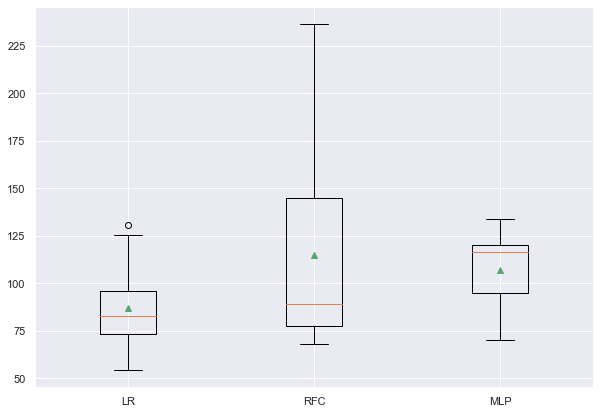

In [127]:
## Diagramas de cajas y bigotes modelos

sns.set(rc={'figure.figsize':(10,7)})
bpRecall=list()

for i in range(len(resultados)):
    bpRecall.append(resultados[i]["test_MAPE"])

plt.boxplot(bpRecall, labels=nombres, showmeans=True)

plt.show()

**FALTAN Conclusiones**

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**